**EXTRACCIÓN**

In [142]:
##Insertar el drive##

from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import io
import re
from scipy import stats
from scipy.stats.mstats import winsorize

drive.mount('/content/drive')
ruta_base = "/content/drive/My Drive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [143]:
##Importar librerías y el data set##

import pandas as pd
ruta_csv = ruta_base + "CSV Datos.csv"

##Primera revisión a los datos##

df_dataset = pd.read_csv(ruta_csv , delimiter = ";") #Vista inicial de los datos
print("\nPrimera vista a datos del archivo:")
print(df_dataset.head())



Primera vista a datos del archivo:
    state  calender_year  calender_quarter  labor_force  employment  unemployment unemployment_rate  quarter_gdp  benefits_paid  initial_claims  first_payments  weeks_claimed  weeks_compensated  total_wp  male_wp  total_uielwp  total_empwp  total_unempwp  inschool_wp  lths_wp  hsged_wp  postsecondary_wp  youth_wp  adult_wp  age1844_wp  age4554_wp  agegt55_wp  ee_num_wp
0  Alaska           1995                 1       299034      274834         24200               8,1          NaN       38474370           33099           16009         266089             227337   85364.0  51187.0       49204.0          NaN        85364.0          NaN  13424.0   62915.0            9025.0   13946.0   71418.0     56453.0     10831.0      4134.0    13719.0
1  Alaska           1995                 2       303125      281672         21453               7,1          NaN       28353677           26325           10509         201268             172714  102013.0  60852.0       5

In [144]:
##Modificación de encabezados de las columnas##

dataset_sin_encabezado = ruta_base + "dataset_sin_encabezado.csv"
df_dataset.to_csv(dataset_sin_encabezado , index = False , header = False) #Cambio a archivo sin encabezados
df_sin_encabezado = pd.read_csv(dataset_sin_encabezado, delimiter = "," , header= None)
print("\nVista de datos sin encabezado:")
print(df_sin_encabezado.head()) #verificación de encabezados en el df
nombres_columnas = ["Estado" , "Año" , "Trimestre" , "Total fuerza laboral" , "Personas empleadas" , "Personas desempleadas" , "Índice de empleabilidad" , "GDP Trimestre" , "Beneficios pagados" , "Reclamaciones iniciales" , "Pagos iniciales" , "Semanas reclamadas" , "Semanas compensadas" , "Total candidatos al programa Wagner Peyser" , "Hombres candidatos al programa Wagner Peyser" , "Total candidatos elegibles para el programa Wagner Peyser" ,
"Personas empleadas que aplicaron al programa" , "Personas desempleadas que aplicaron al programa" , "Candidatos con nivel de escolaridad cursando High School" ,
                    "Candidatos con nivel de escolaridad menor a High School" , "Candidatos con nivel de escolaridad High School" , "Candidatos con nivel de escolaridad Postsecondary" , "Candidatos menores de 19 años" , "Candidatos entre 19 y 22 años" , "Candidatos entre 22 y 44 años" ,
                    "Candidatos entre 45 y 54 años" , "Candidatos mayores de 55 años" , "Total personas empleadas por el programa"] #Definición de encabezados

df_sin_encabezado.columns = nombres_columnas
print("\nVista de datos con encabezado:")
print(df_sin_encabezado.head()) #Verificación de encabezados en el documento

#Creación de columnas "Candidatas mujeres" para mejor revisión

df_sin_encabezado["Mujeres candidatas al programa Wagner Peyser"] = (
    df_sin_encabezado["Total candidatos al programa Wagner Peyser"] -
    df_sin_encabezado["Hombres candidatos al programa Wagner Peyser"]
)

print("\nVista de datos con la nueva columna 'Mujeres candidatas al programa Wagner Peyser':")
print(df_sin_encabezado.head())

summary_stats = df_sin_encabezado.info()
print("\nResumen estadístico de los datos:")
print(summary_stats)

buffer = io.StringIO()
df_sin_encabezado.info(buf=buffer)
info_str = buffer.getvalue()

# Procesar la salida para extraer Column Name, Non-Null Count y Data Type
info_lines = info_str.split("\n")[5:-2]  # Omitimos las primeras y últimas líneas no necesarias

column_numbers = []
columns = []
non_null_counts = []
data_types = []

for idx, line in enumerate(info_lines, start=1):
    parts = line.split()
    column_numbers.append(idx)  # Agregar número de columna
    columns.append(parts[1])  # Nombre de la columna
    non_null_counts.append(parts[2])  # Cantidad de valores no nulos
    data_types.append(parts[-1])  # Tipo de dato

# Crear un DataFrame con la información estructurada
info_df = pd.DataFrame({
    "Column Number": column_numbers,  # Agregar número de columna
    "Column Name": columns,
    "Non-Null Count": non_null_counts,
    "Data Type": data_types
})

info_df.to_excel("/content/drive/My Drive/df_info.xlsx", index=False)


Vista de datos sin encabezado:
       0     1   2       3       4      5    6   7         8      9      10      11      12        13       14       15    16        17    18       19       20       21       22       23       24       25      26       27
0  Alaska  1995   1  299034  274834  24200  8,1 NaN  38474370  33099  16009  266089  227337   85364.0  51187.0  49204.0   NaN   85364.0   NaN  13424.0  62915.0   9025.0  13946.0  71418.0  56453.0  10831.0  4134.0  13719.0
1  Alaska  1995   2  303125  281672  21453  7,1 NaN  28353677  26325  10509  201268  172714  102013.0  60852.0  55947.0   NaN  102013.0   NaN  16128.0  75011.0  10874.0  15610.0  86403.0  67232.0  13801.0  5370.0  19065.0
2  Alaska  1995   3  309136  290146  18990  6,1 NaN  19273208  21732   7256  138443  114746   47460.0  27795.0  11985.0   NaN   47460.0   NaN  10155.0  33474.0   3831.0   7990.0  39470.0  30845.0   6340.0  2285.0   7465.0
3  Alaska  1995   4  303368  281739  21629  7,1 NaN  27538256  33599  13058  196

In [145]:
buffer = io.StringIO()
df_sin_encabezado.info(buf=buffer)
info_str = buffer.getvalue()

# Procesar la salida para extraer Column Number, Column Name, Non-Null Count y Data Type
info_lines = info_str.split("\n")[5:-2]  # Omitimos las primeras y últimas líneas innecesarias

column_numbers = []
columns = []
non_null_counts = []
data_types = []

for idx, line in enumerate(info_lines, start=1):
    match = re.match(r"\s*(\S.*?)\s+(\d+)\s+non-null\s+(\S+)", line)
    if match:
        column_numbers.append(idx)  # Número de columna
        columns.append(match.group(1))  # Nombre de la columna
        non_null_counts.append(match.group(2))  # Cantidad de valores no nulos
        data_types.append(match.group(3))  # Tipo de dato

# Crear un DataFrame con la información estructurada
info_df = pd.DataFrame({
    "Column Number": column_numbers,  # Número de columna
    "Column Name": columns,  # Nombre de la columna
    "Non-Null Count": non_null_counts,  # Cantidad de valores no nulos
    "Data Type": data_types  # Tipo de dato
})
info_df.to_excel("/content/drive/My Drive/df_info.xlsx", index=False)

In [146]:
##Identificación y cambio tipos de variables##

print("\nTipos de datos de cada columna:")
print(df_sin_encabezado.dtypes) #Vista de tipo de variable por columna

columnas_a_convertir = ["Total fuerza laboral", "Personas empleadas", "Personas desempleadas", "Total candidatos al programa Wagner Peyser", "Hombres candidatos al programa Wagner Peyser" , "Total candidatos elegibles para el programa Wagner Peyser" ,
                        "Personas empleadas que aplicaron al programa" , "Personas desempleadas que aplicaron al programa" , "Candidatos con nivel de escolaridad cursando High School" , "Candidatos con nivel de escolaridad menor a High School",
                        "Candidatos con nivel de escolaridad High School" , "Candidatos con nivel de escolaridad Postsecondary" , "Candidatos menores de 19 años" , "Candidatos entre 19 y 22 años" , "Candidatos entre 22 y 44 años" ,
                        "Candidatos entre 45 y 54 años" , "Candidatos mayores de 55 años" , "Total personas empleadas por el programa"]

for col in columnas_a_convertir:
    df_sin_encabezado[col] = df_sin_encabezado[col].fillna(0).astype(int) #Conversión de datos "float" a datos "int" para evitar errores


print("\nTipos de datos después de la conversión:")
print(df_sin_encabezado.dtypes) #Revisión de la transformación


Tipos de datos de cada columna:
Estado                                                        object
Año                                                            int64
Trimestre                                                      int64
Total fuerza laboral                                           int64
Personas empleadas                                             int64
Personas desempleadas                                          int64
Índice de empleabilidad                                       object
GDP Trimestre                                                float64
Beneficios pagados                                             int64
Reclamaciones iniciales                                        int64
Pagos iniciales                                                int64
Semanas reclamadas                                             int64
Semanas compensadas                                            int64
Total candidatos al programa Wagner Peyser                   float64
H

In [147]:
##Verificación de coherencia datos numéricos##

#Verificación total fuerza laboral

df_sin_encabezado["Verificación cantidad fuerza laboral"] = (
    df_sin_encabezado["Personas empleadas"] + df_sin_encabezado["Personas desempleadas"]
) == df_sin_encabezado["Total fuerza laboral"]


#Verificación total candidatos al programa empleados/desempleados

df_sin_encabezado["Verificación cantidad candidatos al programa por estado de empleabilidad"] = (
    df_sin_encabezado["Personas empleadas que aplicaron al programa"] + df_sin_encabezado["Personas desempleadas que aplicaron al programa"]
) == df_sin_encabezado["Total candidatos al programa Wagner Peyser"]


#Verificación total candidatos al programa por edades

df_sin_encabezado["Verificación cantidad candidatos al programa por edades"] = (
    df_sin_encabezado["Candidatos menores de 19 años"] + df_sin_encabezado["Candidatos entre 22 y 44 años"] + df_sin_encabezado["Candidatos entre 45 y 54 años"] + df_sin_encabezado["Candidatos mayores de 55 años"]
) == df_sin_encabezado["Total candidatos al programa Wagner Peyser"]

print("\nVerificación datos:")
print(df_sin_encabezado.head(10))




Verificación datos:
   Estado   Año  Trimestre  Total fuerza laboral  Personas empleadas  Personas desempleadas Índice de empleabilidad  GDP Trimestre  Beneficios pagados  Reclamaciones iniciales  Pagos iniciales  Semanas reclamadas  Semanas compensadas  Total candidatos al programa Wagner Peyser  Hombres candidatos al programa Wagner Peyser  Total candidatos elegibles para el programa Wagner Peyser  Personas empleadas que aplicaron al programa  Personas desempleadas que aplicaron al programa  Candidatos con nivel de escolaridad cursando High School  Candidatos con nivel de escolaridad menor a High School  Candidatos con nivel de escolaridad High School  Candidatos con nivel de escolaridad Postsecondary  Candidatos menores de 19 años  Candidatos entre 19 y 22 años  Candidatos entre 22 y 44 años  Candidatos entre 45 y 54 años  Candidatos mayores de 55 años  Total personas empleadas por el programa  Mujeres candidatas al programa Wagner Peyser  Verificación cantidad fuerza laboral  Veri

In [148]:
##Detección de valores nulos##

df_sin_encabezado["Es_Nulo"] = df_sin_encabezado.isnull().any(axis=1)

#Estados

estados_validos = ["Alabama" , "Alaska" , "Arizona" , "Arkansas" , "California" , "Colorado" , "Connecticut" , "Delaware" , "District of Col" , "Florida" , "Georgia" , "Hawaii" , "Idaho" , "Illinois" , "Indiana" , "Iowa" , "Kansas" ,
                   "Kentucky" , "Louisiana" , "Maine" , "Maryland" , "Massachusetts" , "Michigan" , "Minnesota" , "Mississippi" , "Missouri" , "Montana" , "Nebraska" , "Nevada" , "New Hampshire" , "New Jersey" , "New Mexico" ,
                   "New York" , "North Carolina" , "North Dakota" , "Ohio" , "Oklahoma" , "Oregon" , "Pennsylvania" , "Rhode Island" , "South Carolina" , "South Dakota" , "Tennessee" , "Texas" , "Utah" , "Vermont" ,
                   "Virginia" , "Washington" , "West Virginia" , "Wisconsin" , "Wyoming"]
df_sin_encabezado["Estado_Invalido"] = ~df_sin_encabezado["Estado"].isin(estados_validos)

#Años válidos

años_validos = [1995 , 1996 , 1997 , 1998 , 1999 , 2000 , 2001 , 2002 , 2003 , 2004 , 2005 , 2006 , 2007 , 2008 , 2009 , 2010 , 2011]
df_sin_encabezado["Año_Invalido"] = ~df_sin_encabezado["Año"].isin(años_validos)

In [149]:
##Vista para visualización de datos anómalos##

pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

# Mostrar las filas con anomalías
df_sin_encabezado_anomalos = df_sin_encabezado[df_sin_encabezado[["Es_Nulo", "Estado_Invalido", "Año_Invalido"]].any(axis=1)]
print("Datos anómalos detectados:")
print(df_sin_encabezado_anomalos)

df_sin_encabezado_anomalos.to_csv(ruta_base + "datos_anomalos_detectados.csv", index=False)

cantidad_anomalos = df_sin_encabezado_anomalos.shape[0]
print(f"Cantidad de datos anómalos detectados: {cantidad_anomalos}")

Datos anómalos detectados:
               Estado   Año  Trimestre  Total fuerza laboral  Personas empleadas  Personas desempleadas Índice de empleabilidad  GDP Trimestre  Beneficios pagados  Reclamaciones iniciales  Pagos iniciales  Semanas reclamadas  Semanas compensadas  Total candidatos al programa Wagner Peyser  Hombres candidatos al programa Wagner Peyser  Total candidatos elegibles para el programa Wagner Peyser  Personas empleadas que aplicaron al programa  Personas desempleadas que aplicaron al programa  Candidatos con nivel de escolaridad cursando High School  Candidatos con nivel de escolaridad menor a High School  Candidatos con nivel de escolaridad High School  Candidatos con nivel de escolaridad Postsecondary  Candidatos menores de 19 años  Candidatos entre 19 y 22 años  Candidatos entre 22 y 44 años  Candidatos entre 45 y 54 años  Candidatos mayores de 55 años  Total personas empleadas por el programa  Mujeres candidatas al programa Wagner Peyser  Verificación cantidad fu

In [150]:
##Resumen construcción de dataframes##

print(df_sin_encabezado.head(10))

   Estado   Año  Trimestre  Total fuerza laboral  Personas empleadas  Personas desempleadas Índice de empleabilidad  GDP Trimestre  Beneficios pagados  Reclamaciones iniciales  Pagos iniciales  Semanas reclamadas  Semanas compensadas  Total candidatos al programa Wagner Peyser  Hombres candidatos al programa Wagner Peyser  Total candidatos elegibles para el programa Wagner Peyser  Personas empleadas que aplicaron al programa  Personas desempleadas que aplicaron al programa  Candidatos con nivel de escolaridad cursando High School  Candidatos con nivel de escolaridad menor a High School  Candidatos con nivel de escolaridad High School  Candidatos con nivel de escolaridad Postsecondary  Candidatos menores de 19 años  Candidatos entre 19 y 22 años  Candidatos entre 22 y 44 años  Candidatos entre 45 y 54 años  Candidatos mayores de 55 años  Total personas empleadas por el programa  Mujeres candidatas al programa Wagner Peyser  Verificación cantidad fuerza laboral  Verificación cantidad can

In [151]:
##Cargar y transformar datasets complementarios##

#Datos de ingreso medio por habitante

ruta_IMPH = ruta_base + "Complementario IMPH.csv"

df_complementario_IMPH = pd.read_csv(ruta_IMPH , delimiter = ",") #Vista inicial de los datos
print("\nDatos complementarios ingreso medio por habitante:")
print(df_complementario_IMPH.head())

nuevos_nombres_IMPH = ["Fecha" , "Ingreso medio por habitante"]
df_complementario_IMPH.columns = nuevos_nombres_IMPH

print("\nDatos complementarios ingreso medio por habitante:")
print(df_complementario_IMPH.head())
print(df_complementario_IMPH.dtypes)

df_complementario_IMPH["Fecha"] = pd.to_datetime(df_complementario_IMPH["Fecha"], errors='coerce')
print(df_complementario_IMPH.head())
print(df_complementario_IMPH.dtypes)


#Datos del PIB per capita

ruta_PIB = ruta_base + "Complementario PIB.csv"

df_complementario_PIB = pd.read_csv(ruta_PIB , delimiter = ",") #Vista inicial de los datos
print("\nDatos complementarios PIB per capita:")
nuevos_nombres_PIB = ["Fecha" , "PIB per capita"]
df_complementario_PIB.columns = nuevos_nombres_PIB
print(df_complementario_PIB.head())
print(df_complementario_PIB.dtypes)

df_complementario_PIB["Fecha"] = pd.to_datetime(df_complementario_PIB["Fecha"], errors='coerce')
print(df_complementario_PIB.head())
print(df_complementario_PIB.dtypes)


#Datos del índice de desempleo en USA

ruta_ID = ruta_base + "Complementario indice desempleo.csv"

df_complementario_ID = pd.read_csv(ruta_ID , delimiter = ",") #Vista inicial de los datos
print("\nDatos complementarios indice de desempleo:")
nuevos_nombres_ID = ["Fecha" , "Indice desempleo"]
df_complementario_ID.columns = nuevos_nombres_ID

df_complementario_ID["Fecha"] = pd.to_datetime(df_complementario_ID["Fecha"], errors='coerce')
print(df_complementario_ID.head())
print(df_complementario_ID.dtypes)


#Datos del índice de desempleo en USA migrantes latinos

ruta_ID_migrantes = ruta_base + "Complementario indice desempleo latinos.csv"

df_complementario_ID_migrantes = pd.read_csv(ruta_ID_migrantes , delimiter = ",") #Vista inicial de los datos
print("\nDatos complementarios indice de desempleo de migrantes latinos:")
print(df_complementario_ID_migrantes.head())
print(df_complementario_ID_migrantes.dtypes)
nuevos_nombres_ID_migrantes = ["Fecha" , "Indice desempleo latinos"]
df_complementario_ID_migrantes.columns = nuevos_nombres_ID_migrantes

df_complementario_ID_migrantes["Fecha"] = pd.to_datetime(df_complementario_ID_migrantes["Fecha"], errors='coerce')
print(df_complementario_ID_migrantes.head())
print(df_complementario_ID_migrantes.dtypes)




Datos complementarios ingreso medio por habitante:
  observation_date  MEHOINUSA646N
0       1996-01-01          35490
1       1997-01-01          37010
2       1998-01-01          38890
3       1999-01-01          40700
4       2000-01-01          41990

Datos complementarios ingreso medio por habitante:
        Fecha  Ingreso medio por habitante
0  1996-01-01                        35490
1  1997-01-01                        37010
2  1998-01-01                        38890
3  1999-01-01                        40700
4  2000-01-01                        41990
Fecha                          object
Ingreso medio por habitante     int64
dtype: object
       Fecha  Ingreso medio por habitante
0 1996-01-01                        35490
1 1997-01-01                        37010
2 1998-01-01                        38890
3 1999-01-01                        40700
4 2000-01-01                        41990
Fecha                          datetime64[ns]
Ingreso medio por habitante             int64


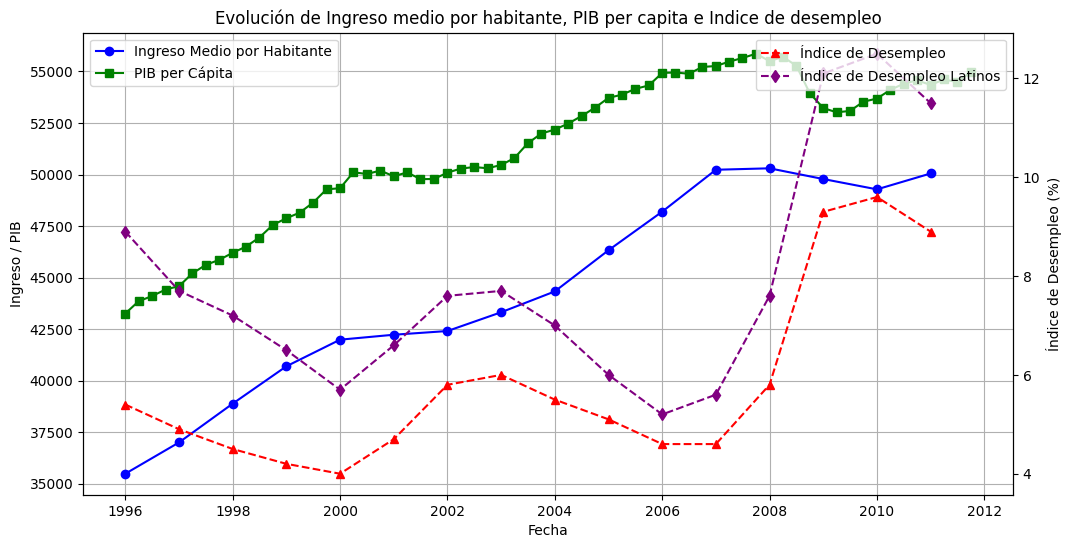

In [152]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje primario (Ingreso y PIB)
ax1.plot(df_complementario_IMPH["Fecha"], df_complementario_IMPH["Ingreso medio por habitante"],
         label="Ingreso Medio por Habitante", marker="o", color="blue")
ax1.plot(df_complementario_PIB["Fecha"], df_complementario_PIB["PIB per capita"],
         label="PIB per Cápita", marker="s", color="green")

ax1.set_xlabel("Fecha")
ax1.set_ylabel("Ingreso / PIB", color="black")
ax1.tick_params(axis="y", labelcolor="black")
ax1.legend(loc="upper left")
ax1.grid(True)

# Crear segundo eje Y
ax2 = ax1.twinx()

# Eje secundario (Índice de Desempleo)
ax2.plot(df_complementario_ID["Fecha"], df_complementario_ID["Indice desempleo"],
         label="Índice de Desempleo", marker="^", color="red", linestyle="dashed")
ax2.plot(df_complementario_ID_migrantes["Fecha"], df_complementario_ID_migrantes["Indice desempleo latinos"],
         label="Índice de Desempleo Latinos", marker="d", color="purple", linestyle="dashed")

ax2.set_ylabel("Índice de Desempleo (%)", color="black")
ax2.tick_params(axis="y", labelcolor="black")
ax2.legend(loc="upper right")

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Mostrar la gráfica
plt.title("Evolución de Ingreso medio por habitante, PIB per capita e Indice de desempleo")
plt.show()

In [154]:
# Instalar librerías necesarias
!pip uninstall -y pandas-profiling
!pip install ydata-profiling
!pip install numba==0.58.1

# Importar librerías
from ydata_profiling import ProfileReport
from sklearn.datasets import load_diabetes

# Cargar el dataset
#diabetes = load_diabetes(as_frame=True)
#df = diabetes.frame

# Generar perfilamiento de datos con Pandas Profiling
profile = ProfileReport(df_sin_encabezado, title="Análisis Exploratorio")

# Mostrar reporte en Colab
profile.to_widgets()

ImportError: Numba needs NumPy 1.26 or less

**TRANSFORMACIÓN**

<ipython-input-155-c45de5f115be>:4: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





               Estado   Año  Trimestre  Total fuerza laboral  Personas empleadas  Personas desempleadas Índice de empleabilidad  GDP Trimestre  Beneficios pagados  Reclamaciones iniciales  Pagos iniciales  Semanas reclamadas  Semanas compensadas  Total candidatos al programa Wagner Peyser  Hombres candidatos al programa Wagner Peyser  Total candidatos elegibles para el programa Wagner Peyser  Personas empleadas que aplicaron al programa  Personas desempleadas que aplicaron al programa  Candidatos con nivel de escolaridad cursando High School  Candidatos con nivel de escolaridad menor a High School  Candidatos con nivel de escolaridad High School  Candidatos con nivel de escolaridad Postsecondary  Candidatos menores de 19 años  Candidatos entre 19 y 22 años  Candidatos entre 22 y 44 años  Candidatos entre 45 y 54 años  Candidatos mayores de 55 años  Total personas empleadas por el programa  Mujeres candidatas al programa Wagner Peyser  Verificación cantidad fuerza laboral  Verificación 

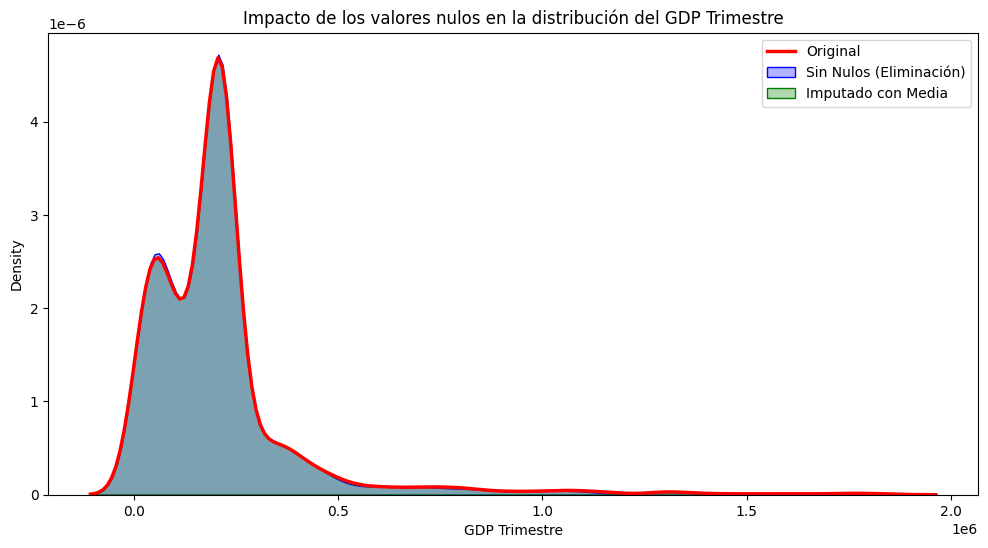

In [155]:
##Transformación datos GDP Trimestre con imputación medidas estadísticas

media_dato= df_sin_encabezado["GDP Trimestre"].mean()
df_sin_encabezado["GDP Trimestre"].fillna(media_dato, inplace=True)

print(df_sin_encabezado)

# Manejo de valores nulos
df_dropped = df_sin_encabezado.dropna()  # Opción 1: Eliminar filas con valores nulos

# Estadísticas después de manejar valores nulos
print("\nEstadísticas sin valores nulos:")
print(df_dropped.describe())

df_filled_mean = df_sin_encabezado.fillna(df_sin_encabezado.mean(numeric_only=True))  # Opción 2: Reemplazar por la media

# Estadísticas después de reemplazar por la media
print("\nEstadísticas reemplazando con la media:")
print(df_filled_mean.describe())

# Graficar KDE asegurando que no haya valores nulos
plt.figure(figsize=(12, 6))

# Filtramos NaN en la columna 'Salario' para evitar problemas en la visualización
sns.kdeplot(df_sin_encabezado["GDP Trimestre"].dropna(), label="Original", color="red", linewidth=2.5)  # Línea más gruesa
sns.kdeplot(df_dropped["GDP Trimestre"], label="Sin Nulos (Eliminación)", color="blue", fill=True, alpha=0.3)
sns.kdeplot(df_filled_mean["GDP Trimestre"], label="Imputado con Media", color="green", fill=True, alpha=0.3)

plt.title("Impacto de los valores nulos en la distribución del GDP Trimestre")
plt.xlabel("GDP Trimestre")
plt.legend()
plt.show()

In [156]:
cantidad_años_invalidos = df_sin_encabezado["Año_Invalido"].sum()
print(f"Cantidad de años inválidos: {cantidad_años_invalidos}")

cantidad_estados_invalidos = df_sin_encabezado["Estado_Invalido"].sum()
print(f"Cantidad de estados inválidos: {cantidad_estados_invalidos}")

cantidad_nulos = df_sin_encabezado["GDP Trimestre"].isnull().sum()
print(f"Cantidad de valores nulos: {cantidad_nulos}")

cantidad_ver_fuerza_laboral = df_sin_encabezado.shape[0] - df_sin_encabezado["Verificación cantidad fuerza laboral"].sum()
print(f"Suma fuerza laboral inconsistente: {cantidad_ver_fuerza_laboral}")

cantidad_ver_candidatos = df_sin_encabezado.shape[0] - df_sin_encabezado["Verificación cantidad candidatos al programa por estado de empleabilidad"].sum()
print(f"Suma candidatos al programa inconsistentes: {cantidad_ver_candidatos}")

Cantidad de años inválidos: 0
Cantidad de estados inválidos: 0
Cantidad de valores nulos: 0
Suma fuerza laboral inconsistente: 805
Suma candidatos al programa inconsistentes: 658


     Año  Total personas empleadas por el programa
0   1995                                   8663601
1   1996                                   8439420
2   1997                                   8314763
3   1998                                   8124186
4   1999                                   8139886
5   2000                                   8716010
6   2001                                   9311334
7   2002                                   6770254
8   2003                                   7858320
9   2004                                  26921490
10  2005                                  24772930
11  2006                                  24061201
12  2007                                  20744959
13  2008                                  22127455
14  2009                                  21932859
15  2010                                  22407834
16  2011                                  25192595
     Año  Total fuerza laboral
0   1995          2.618215e+06
1   1996          2.

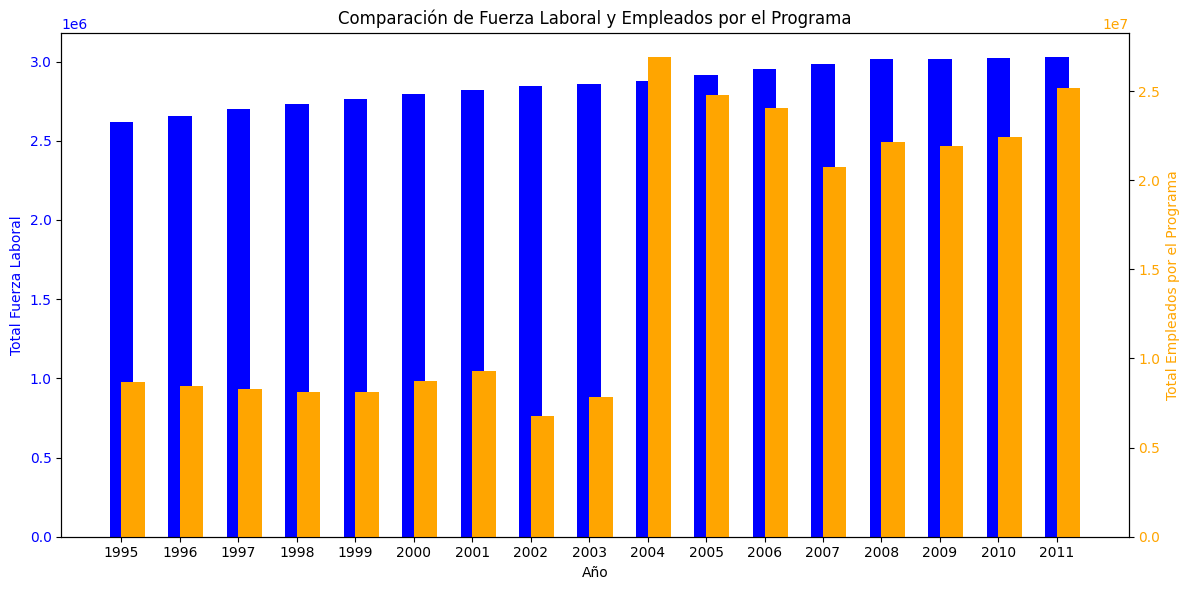

In [157]:
anual_EP = df_sin_encabezado.groupby('Año')['Total personas empleadas por el programa'].sum().reset_index()  # Sumar valores trimestrales por año
anual_FL = df_sin_encabezado.groupby('Año')['Total fuerza laboral'].mean().reset_index()  # Sumar valores trimestrales por año

print(anual_EP)
print(anual_FL)

# Crear la figura y el eje
fig, ax1 = plt.subplots(figsize=(12, 6))

# Convertir los años a enteros si es necesario
anual_FL["Año"] = anual_FL["Año"].astype(int)
anual_EP["Año"] = anual_EP["Año"].astype(int)

# Gráfica de barras para Total fuerza laboral en el eje primario
ax1.bar(anual_FL["Año"], anual_FL["Total fuerza laboral"], width=0.4, label="Total Fuerza Laboral", color='blue', align='center')
ax1.set_xlabel("Año")
ax1.set_ylabel("Total Fuerza Laboral", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title("Comparación de Fuerza Laboral y Empleados por el Programa")

# Configurar el eje X para que solo muestre años enteros
ax1.set_xticks(anual_FL["Año"])

# Crear un segundo eje Y
ax2 = ax1.twinx()

# Gráfica de barras para Total personas empleadas por el programa en el segundo eje
ax2.bar(anual_EP["Año"], anual_EP["Total personas empleadas por el programa"], width=0.4, label="Total Empleados por el Programa", color='orange', align='edge')
ax2.set_ylabel("Total Empleados por el Programa", color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Rotar etiquetas del eje X
plt.xticks(rotation=45)

# Mostrar la gráfica
fig.tight_layout()  # Ajustar diseño para evitar solapamientos
plt.show()


In [ ]:
z_scores = np.abs(stats.zscore(df_sin_encabezado['Total personas empleadas por el programa']))
df_sin_encabezado['Outlier_Zscore'] = z_scores > 3



In [158]:
def plot_outliers_zscore():
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico

    scatter = sns.scatterplot(x=df_sin_encabezado.index, y=df_sin_encabezado['Total personas empleadas por el programa'], hue=df_sin_encabezado['Outlier_Zscore'],
                              palette={False: 'blue', True: 'red'})

    plt.title("Detección de Outliers - Z-score")
    plt.xlabel("Índice")
    plt.ylabel("Personas empleadas")

    # Configurar la leyenda
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles=handles[:2], labels=["No", "Sí"], title="Outlier")

    plt.show()

# Llamar a la función para graficar
plot_outliers_zscore()

KeyError: 'Outlier_Zscore'

<Figure size 1000x600 with 0 Axes>

In [159]:
z_scores1 = np.abs(stats.zscore(df_sin_encabezado['Total candidatos al programa Wagner Peyser']))
df_sin_encabezado['Outlier_Zscore'] = z_scores1 > 3


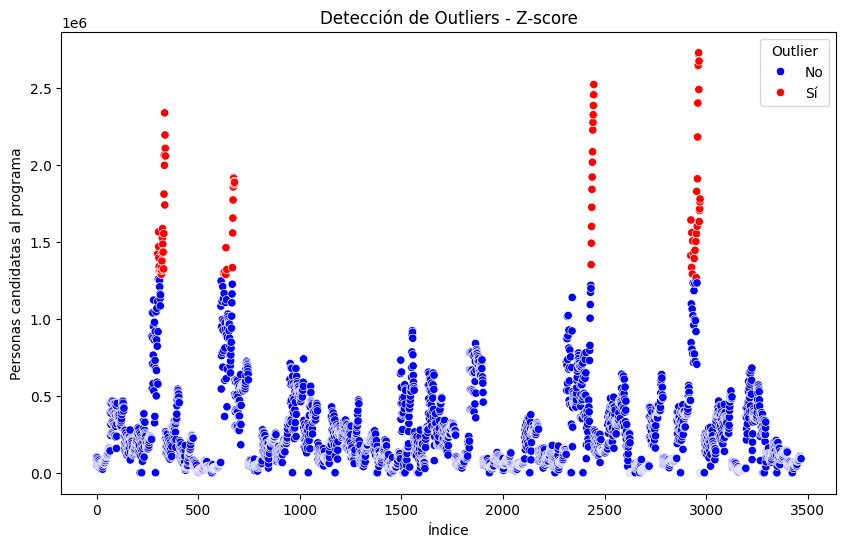

In [160]:
def plot_outliers_zscore():
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico

    scatter = sns.scatterplot(x=df_sin_encabezado.index, y=df_sin_encabezado['Total candidatos al programa Wagner Peyser'], hue=df_sin_encabezado['Outlier_Zscore'],
                              palette={False: 'blue', True: 'red'})

    plt.title("Detección de Outliers - Z-score")
    plt.xlabel("Índice")
    plt.ylabel("Personas candidatas al programa")

    # Configurar la leyenda
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles=handles[:2], labels=["No", "Sí"], title="Outlier")

    plt.show()

# Llamar a la función para graficar
plot_outliers_zscore()



In [161]:
z_scores2 = np.abs(stats.zscore(df_sin_encabezado['Personas empleadas']))
df_sin_encabezado['Outlier_Zscore'] = z_scores2 > 3

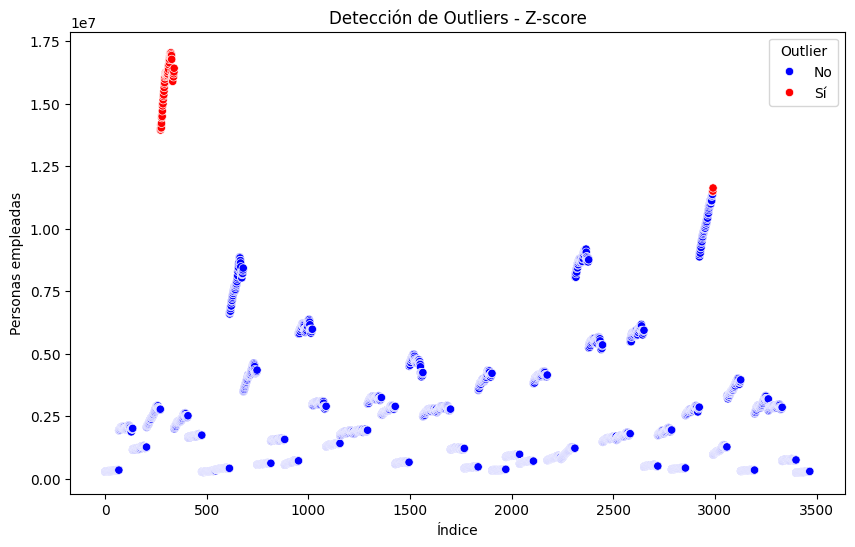

In [162]:
def plot_outliers_zscore():
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico

    scatter = sns.scatterplot(x=df_sin_encabezado.index, y=df_sin_encabezado['Personas empleadas'], hue=df_sin_encabezado['Outlier_Zscore'],
                              palette={False: 'blue', True: 'red'})

    plt.title("Detección de Outliers - Z-score")
    plt.xlabel("Índice")
    plt.ylabel("Personas empleadas")

    # Configurar la leyenda
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles=handles[:2], labels=["No", "Sí"], title="Outlier")

    plt.show()

# Llamar a la función para graficar
plot_outliers_zscore()

In [163]:
z_scores3 = np.abs(stats.zscore(df_sin_encabezado['Personas desempleadas']))
df_sin_encabezado['Outlier_Zscore'] = z_scores3 > 3

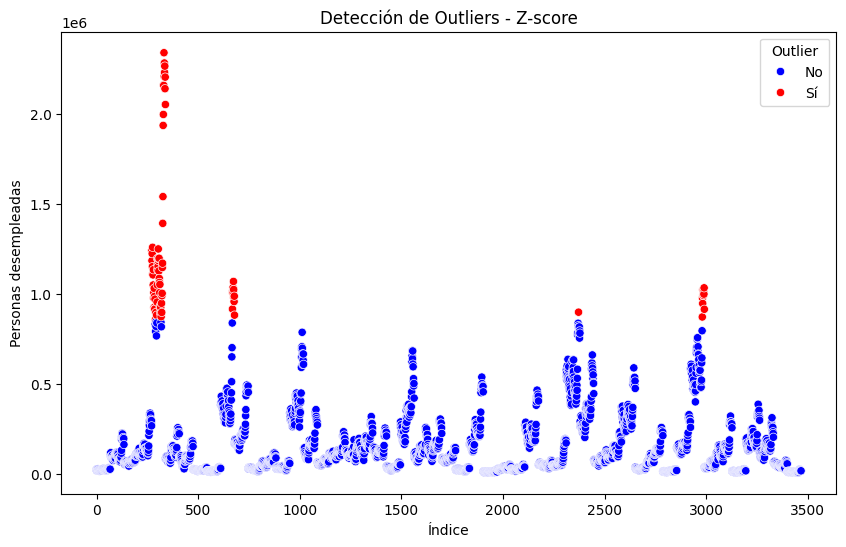

In [164]:
def plot_outliers_zscore():
    plt.figure(figsize=(10, 6))  # Tamaño del gráfico

    scatter = sns.scatterplot(x=df_sin_encabezado.index, y=df_sin_encabezado['Personas desempleadas'], hue=df_sin_encabezado['Outlier_Zscore'],
                              palette={False: 'blue', True: 'red'})

    plt.title("Detección de Outliers - Z-score")
    plt.xlabel("Índice")
    plt.ylabel("Personas desempleadas")

    # Configurar la leyenda
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles=handles[:2], labels=["No", "Sí"], title="Outlier")

    plt.show()

# Llamar a la función para graficar
plot_outliers_zscore()

**INTEGRACIÓN BASES DE DATOS**

In [165]:
###Agrupación de datos nacional de la fuerza laboral y el programa Wagner Peyser###

##Consideración importante: se toman los datos de empleabilidad el último trimestre de cada año

#Agrupación de datos de la base principal: fuerza laboral nacional por año

df_ultimo_trimestre_fl = df_sin_encabezado[df_sin_encabezado["Trimestre"] == 4]

fuerza_laboral_por_ano = df_ultimo_trimestre_fl.groupby("Año")["Total fuerza laboral"].sum().reset_index()

print("\nSuma de la fuerza laboral en el último trimestre de cada año:")
print(fuerza_laboral_por_ano)

#Agrupación de datos de la base principal: fuerza laboral empleada por año

df_ultimo_trimestre_pe = df_sin_encabezado[df_sin_encabezado["Trimestre"] == 4]

fuerza_empleada_por_ano = df_ultimo_trimestre_pe.groupby("Año")["Personas empleadas"].sum().reset_index()

print("\nSuma de la fuerza laboral empleada al cierre del último trimestre de cada año:")
print(fuerza_empleada_por_ano)

#Agrupación de datos de la base principal: educación high school

df_ultimo_trimestre_edhs = df_sin_encabezado[df_sin_encabezado["Trimestre"] == 4]

fuerza_laboral_edhs = df_ultimo_trimestre_edhs.groupby("Año")["Candidatos con nivel de escolaridad High School"].sum().reset_index()

print("\nSuma de la fuerza laboral en el último trimestre de cada año:")
print(fuerza_laboral_edhs)

#Agrupación de datos de la base principal: edad 45-54

df_ultimo_trimestre_edad = df_sin_encabezado[df_sin_encabezado["Trimestre"] == 4]

fuerza_laboral_edad45 = df_ultimo_trimestre_edad.groupby("Año")["Candidatos entre 45 y 54 años"].sum().reset_index()

print("\nSuma de la fuerza laboral en el último trimestre de cada año:")
print(fuerza_laboral_edad45)

#Agrupación de datos de la base principal: edad 22-44

df_ultimo_trimestre_edad22 = df_sin_encabezado[df_sin_encabezado["Trimestre"] == 4]

fuerza_laboral_edad22 = df_ultimo_trimestre_edad22.groupby("Año")["Candidatos entre 22 y 44 años"].sum().reset_index()

print("\nSuma de la fuerza laboral en el último trimestre de cada año:")
print(fuerza_laboral_edad22)

##Consideración importante: se toma como un registro independiente si una persona aplica dos o más veces al programa durante el mismo año

#Agrupación de datos de la base principal: aplicación al programa Wagner Peyser

fuerza_aplicante_al_programa = df_sin_encabezado.groupby("Año")["Total candidatos al programa Wagner Peyser"].sum().reset_index()

print("\nSuma anual de la fuerza laboral candidata al programa Wagner Peyser:")
print(fuerza_aplicante_al_programa)

#Agrupación de datos de la base principal: personas empleadas por el programa Wagner

fuerza_empleada_por_wagner = df_sin_encabezado.groupby("Año")["Total personas empleadas por el programa"].sum().reset_index()

print("\nSuma anual de la fuerza laboral empleada por el programa WP:")
print(fuerza_aplicante_al_programa)




Suma de la fuerza laboral en el último trimestre de cada año:
     Año  Total fuerza laboral
0   1995             133825877
1   1996             136471434
2   1997             138387033
3   1998             140108290
4   1999             141611689
5   2000             142949645
6   2001             144192472
7   2002             145345378
8   2003             146087587
9   2004             147480497
10  2005             149557909
11  2006             151791486
12  2007             152782659
13  2008             154064747
14  2009             152954883
15  2010             154076135
16  2011             154695994

Suma de la fuerza laboral empleada al cierre del último trimestre de cada año:
     Año  Personas empleadas
0   1995           126837725
1   1996           129703476
2   1997           132367063
3   1998           134337158
4   1999           136230880
5   2000           137691791
6   2001           136652657
7   2002           137263740
8   2003           138005185
9   2004 

In [166]:
###Unión información agrupada###
df_integrado = pd.merge(fuerza_laboral_por_ano, fuerza_empleada_por_ano, on="Año", how="outer")
df_integrado = pd.merge(df_integrado, fuerza_aplicante_al_programa, on="Año", how="outer")
df_integrado = pd.merge(df_integrado, fuerza_empleada_por_wagner, on="Año", how="outer")
df_integrado = pd.merge(df_integrado, fuerza_laboral_edhs, on="Año", how="outer")
df_integrado = pd.merge(df_integrado, fuerza_laboral_edad45, on="Año", how="outer")
df_integrado = pd.merge(df_integrado, fuerza_laboral_edad22, on="Año", how="outer")


#Renombrar
df_integrado.columns = ["Año", "Total fuerza laboral", "Total Personas empleadas", "Candidatos al programa" , "Fuerza laboral empleada por WP" , "Fuerza laboral con educación HS" , "Fuerza laboral entre 45 y 54 años" , "Fuerza laboral entre 22 y 44 años"]

# Mostramos el resultado
print("\nResumen nacional de variables:")
print(df_integrado)


Resumen nacional de variables:
     Año  Total fuerza laboral  Total Personas empleadas  Candidatos al programa  Fuerza laboral empleada por WP  Fuerza laboral con educación HS  Fuerza laboral entre 45 y 54 años  Fuerza laboral entre 22 y 44 años
0   1995             133825877                 126837725                56350103                         8663601                          8291113                            1632439                            8264293
1   1996             136471434                 129703476                56138696                         8439420                          8689379                            1698766                            8213548
2   1997             138387033                 132367063                55576065                         8314763                          7990698                            1703820                            8099573
3   1998             140108290                 134337158                51428187                        

In [167]:
###Verificación y transformación del formato fecha en dataset complementarios###

df_complementario_ID.head(5)
df_complementario_ID["Año"] = list(range(1996, 2012))
df_complementario_ID.head(5)


Fecha  Indice desempleo   Año
0 1996-01-01               5.4  1996
1 1997-01-01               4.9  1997
2 1998-01-01               4.5  1998
3 1999-01-01               4.2  1999
4 2000-01-01               4.0  2000

In [168]:
###Verificación y transformación del formato fecha en dataset complementarios###

df_complementario_ID_migrantes.head(5)


Fecha  Indice desempleo latinos
0 1996-01-01                       8.9
1 1997-01-01                       7.7
2 1998-01-01                       7.2
3 1999-01-01                       6.5
4 2000-01-01                       5.7

In [169]:
df_complementario_ID_migrantes["Fecha"] = pd.to_datetime(df_complementario_ID_migrantes["Fecha"])
df_complementario_ID_migrantes["Año"] = df_complementario_ID_migrantes["Fecha"].dt.year

df_complementario_ID_migrantes.drop(columns=["Fecha"], inplace=True)

print(df_complementario_ID_migrantes.head())

   Indice desempleo latinos   Año
0                       8.9  1996
1                       7.7  1997
2                       7.2  1998
3                       6.5  1999
4                       5.7  2000


In [170]:
###Verificación y transformación del formato fecha en dataset complementarios###

df_complementario_IMPH.head(5)

df_complementario_IMPH["Fecha"] = pd.to_datetime(df_complementario_IMPH["Fecha"])
df_complementario_IMPH["Año"] = df_complementario_IMPH["Fecha"].dt.year

df_complementario_IMPH.drop(columns=["Fecha"], inplace=True)

print(df_complementario_IMPH.head())

   Ingreso medio por habitante   Año
0                        35490  1996
1                        37010  1997
2                        38890  1998
3                        40700  1999
4                        41990  2000


In [171]:
df_complementario_ID.head(5)

Fecha  Indice desempleo   Año
0 1996-01-01               5.4  1996
1 1997-01-01               4.9  1997
2 1998-01-01               4.5  1998
3 1999-01-01               4.2  1999
4 2000-01-01               4.0  2000

In [172]:
###INTEGRACIÓN DE LA INFORMACIÓN DE LAS DIFERENTES BASES DE DATOS###

df_integrado_final = pd.merge(df_integrado, df_complementario_IMPH, on="Año", how="outer")
df_integrado_final = pd.merge(df_integrado_final, df_complementario_ID, on="Año", how="outer")
df_integrado_final = pd.merge(df_integrado_final, df_complementario_ID_migrantes, on="Año", how="outer")

# Mostrar el resultado
print("\nDataFrame final con información de fuerza laboral y PIB:")
print(df_integrado_final.head(50))



DataFrame final con información de fuerza laboral y PIB:
     Año  Total fuerza laboral  Total Personas empleadas  Candidatos al programa  Fuerza laboral empleada por WP  Fuerza laboral con educación HS  Fuerza laboral entre 45 y 54 años  Fuerza laboral entre 22 y 44 años  Ingreso medio por habitante      Fecha  Indice desempleo  Indice desempleo latinos
0   1995             133825877                 126837725                56350103                         8663601                          8291113                            1632439                            8264293                          NaN        NaT               NaN                       NaN
1   1996             136471434                 129703476                56138696                         8439420                          8689379                            1698766                            8213548                      35490.0 1996-01-01               5.4                       8.9
2   1997             138387033            

In [173]:
###Imputación con media estadística en valores nulos###

df_integrado_final.fillna(df_integrado_final.mean(numeric_only=True), inplace=True)

# Verificamos que ya no haya nulos
print("\nValores nulos después del reemplazo:")
print(df_integrado_final.isnull().sum())



Valores nulos después del reemplazo:
Año                                  0
Total fuerza laboral                 0
Total Personas empleadas             0
Candidatos al programa               0
Fuerza laboral empleada por WP       0
Fuerza laboral con educación HS      0
Fuerza laboral entre 45 y 54 años    0
Fuerza laboral entre 22 y 44 años    0
Ingreso medio por habitante          0
Fecha                                1
Indice desempleo                     0
Indice desempleo latinos             0
dtype: int64


In [174]:
###Verificación de resultados###

df_integrado_final.head(5)

Año  Total fuerza laboral  Total Personas empleadas  Candidatos al programa  Fuerza laboral empleada por WP  Fuerza laboral con educación HS  Fuerza laboral entre 45 y 54 años  Fuerza laboral entre 22 y 44 años  Ingreso medio por habitante      Fecha  Indice desempleo  Indice desempleo latinos
0  1995             133825877                 126837725                56350103                         8663601                          8291113                            1632439                            8264293                     44408.75        NaT           5.80625                    7.8375
1  1996             136471434                 129703476                56138696                         8439420                          8689379                            1698766                            8213548                     35490.00 1996-01-01           5.40000                    8.9000
2  1997             138387033                 132367063                55576065                         8314763                          7990698                            1703820                            8099573                     37010.00 1997-01-01           4.90000                    7.7000
3  1998             140108290                 134337158                51428187                         8124186                          7246487                            1621553                            7219908                     38890.00 1998-01-01           4.50000                    7.2000
4  1999             141611689                 136230880                47966534                         8139886                          6520706                            1533350                            6386091                     40700.00 1999-01-01           4.20000                    6.5000

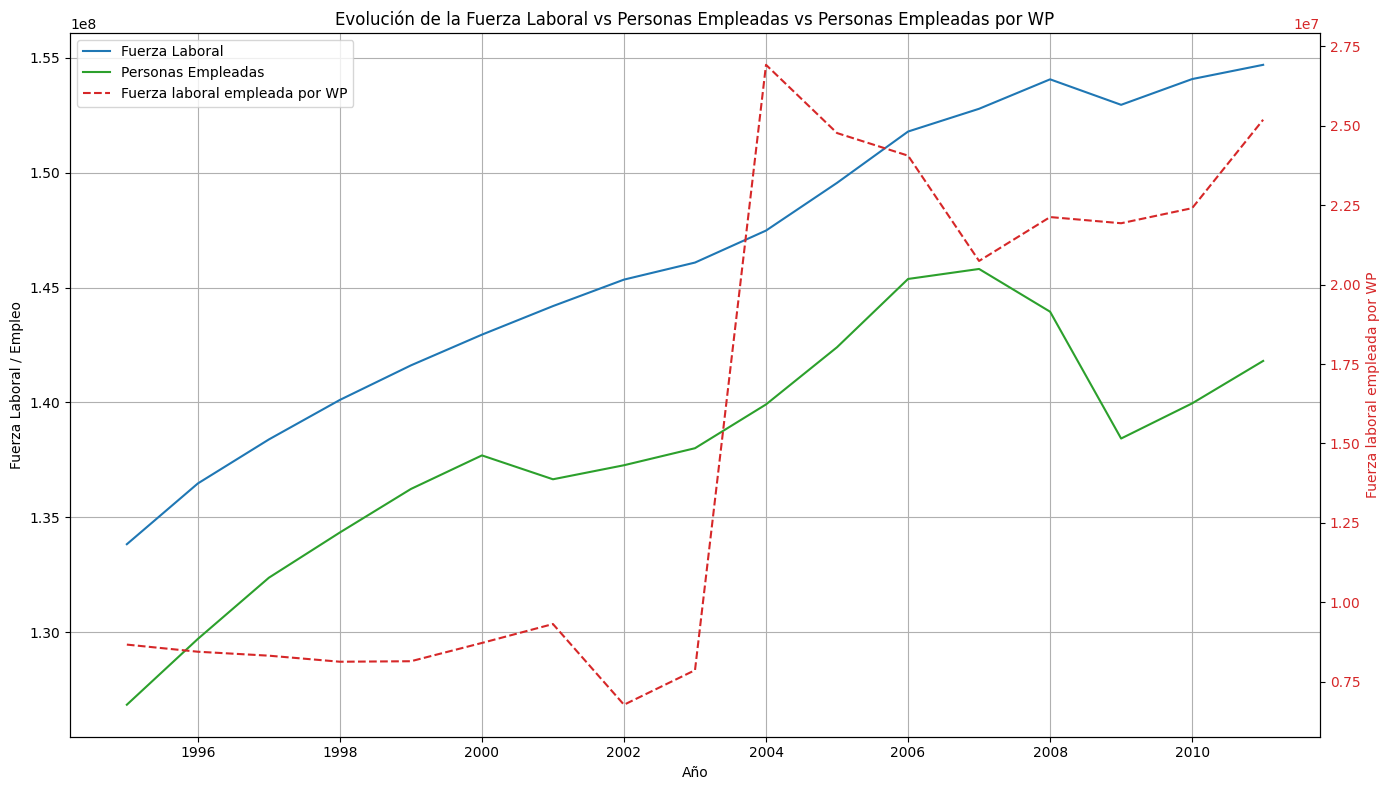

In [175]:
###GRÁFICOS 1###

fig, ax1 = plt.subplots(figsize=(14, 8))

#Primer eje Y
ax1.plot(df_integrado_final["Año"], df_integrado_final["Total fuerza laboral"], label="Fuerza Laboral", color="tab:blue")
ax1.plot(df_integrado_final["Año"], df_integrado_final["Total Personas empleadas"], label="Personas Empleadas", color="tab:green")
ax1.set_xlabel("Año")
ax1.set_ylabel("Fuerza Laboral / Empleo", color="black")
ax1.tick_params(axis='y')
ax1.grid(True)

#Segundo eje Y
ax2 = ax1.twinx()
ax2.plot(df_integrado_final["Año"], df_integrado_final["Fuerza laboral empleada por WP"], label="Fuerza laboral empleada por WP", color="tab:red", linestyle="--")
ax2.set_ylabel("Fuerza laboral empleada por WP", color="tab:red")
ax2.tick_params(axis='y', labelcolor="tab:red")

#Leyenda
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

#Título
plt.title("Evolución de la Fuerza Laboral vs Personas Empleadas vs Personas Empleadas por WP")
plt.tight_layout()
plt.show()

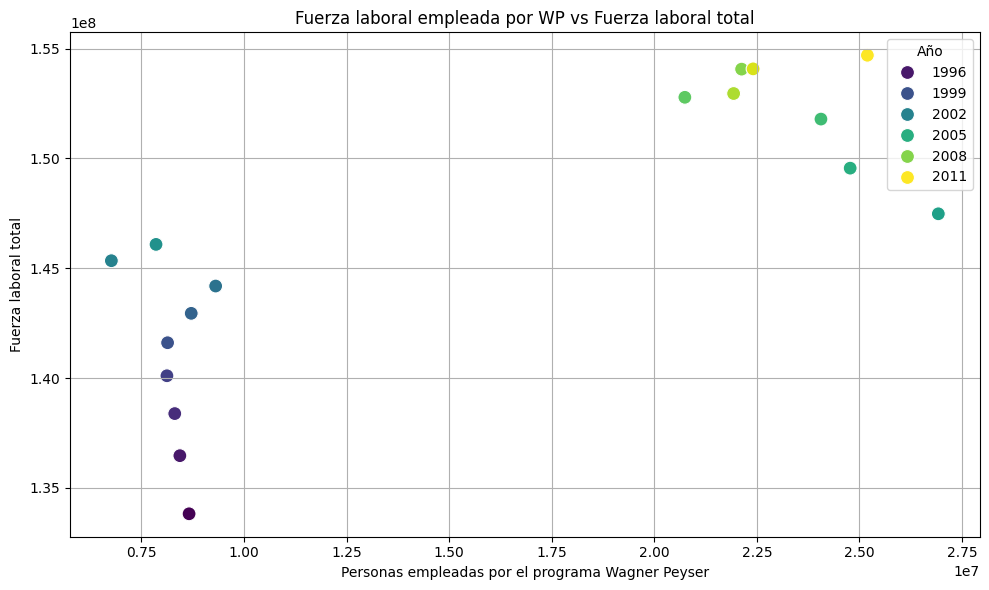

In [176]:
###GRÁFICOS 2###

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_integrado_final,
    x="Fuerza laboral empleada por WP",
    y="Total fuerza laboral",
    hue="Año",  # Opcional: para ver los años con colores diferentes
    palette="viridis",
    s=100
)

plt.title("Fuerza laboral empleada por WP vs Fuerza laboral total")
plt.xlabel("Personas empleadas por el programa Wagner Peyser")
plt.ylabel("Fuerza laboral total")
plt.grid(True)
plt.tight_layout()
plt.show()


In [177]:
###Prueba de correlación###

from scipy.stats import shapiro

columnas_numericas = df_integrado_final.select_dtypes(include=['float64', 'int64'])

print("Prueba de Shapiro-Wilk para normalidad:\n")
for col in columnas_numericas.columns:
    stat, p = shapiro(columnas_numericas[col])
    resultado = "Distribución normal" if p > 0.05 else "No es normal"
    print(f"{col}: W={stat:.4f}, p-value={p:.4f} → {resultado}")

    correlation_matrix = columnas_numericas.corr()

print("\n Matriz de correlación:")
print(correlation_matrix)

Prueba de Shapiro-Wilk para normalidad:

Año: W=0.9621, p-value=0.6704 → Distribución normal
Total fuerza laboral: W=0.9366, p-value=0.2797 → Distribución normal
Total Personas empleadas: W=0.9660, p-value=0.7458 → Distribución normal
Candidatos al programa: W=0.8110, p-value=0.0029 → No es normal
Fuerza laboral empleada por WP: W=0.7764, p-value=0.0010 → No es normal
Fuerza laboral con educación HS: W=0.9359, p-value=0.2732 → Distribución normal
Fuerza laboral entre 45 y 54 años: W=0.8304, p-value=0.0055 → No es normal
Fuerza laboral entre 22 y 44 años: W=0.9297, p-value=0.2151 → Distribución normal
Ingreso medio por habitante: W=0.9287, p-value=0.2067 → Distribución normal
Indice desempleo: W=0.7851, p-value=0.0013 → No es normal
Indice desempleo latinos: W=0.8504, p-value=0.0109 → No es normal

 Matriz de correlación:
                                        Año  Total fuerza laboral  Total Personas empleadas  Candidatos al programa  Fuerza laboral empleada por WP  Fuerza laboral con

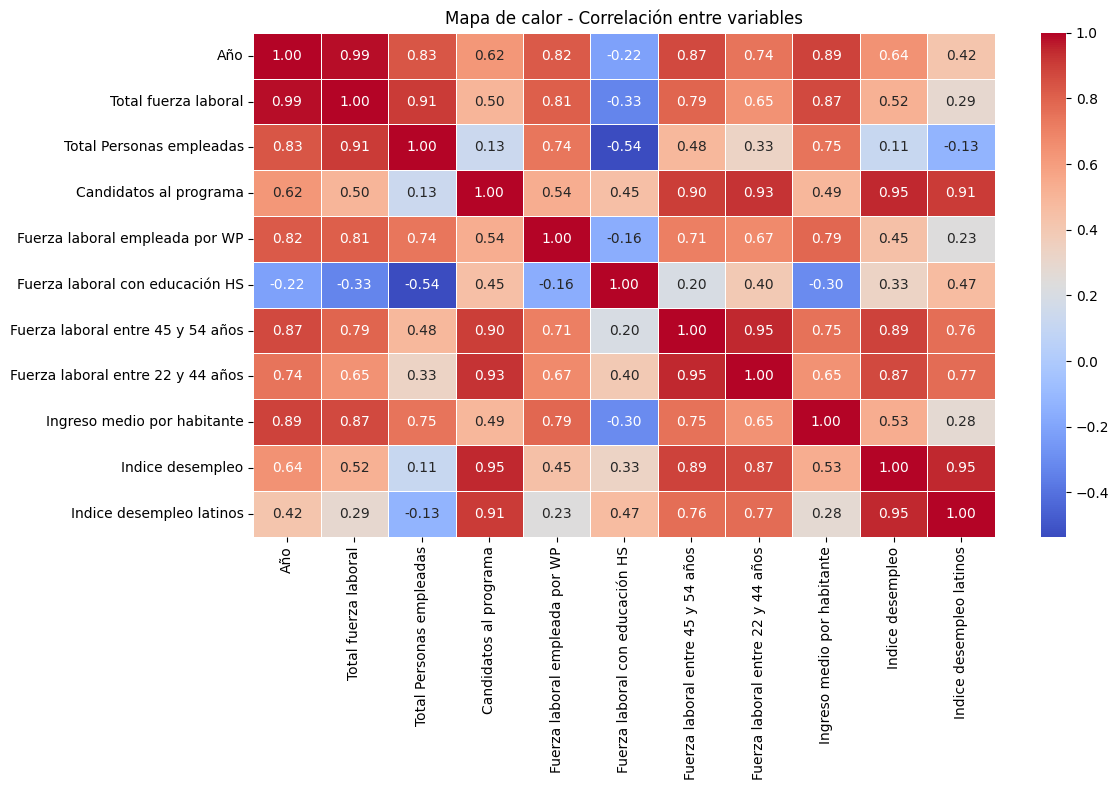

In [178]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de calor - Correlación entre variables")
plt.tight_layout()
plt.show()

# Visualizar relacion entre Indice Desempleo Vs Candidatos al Programa mas a fondo

   Indice desempleo  Candidatos al programa
0           5.80625                56350103
1           5.40000                56138696
2           4.90000                55576065
3           4.50000                51428187
4           4.20000                47966534
Año                                           int64
Total fuerza laboral                          int64
Total Personas empleadas                      int64
Candidatos al programa                        int64
Fuerza laboral empleada por WP                int64
Fuerza laboral con educación HS               int64
Fuerza laboral entre 45 y 54 años             int64
Fuerza laboral entre 22 y 44 años             int64
Ingreso medio por habitante                 float64
Fecha                                datetime64[ns]
Indice desempleo                            float64
Indice desempleo latinos                    float64
dtype: object


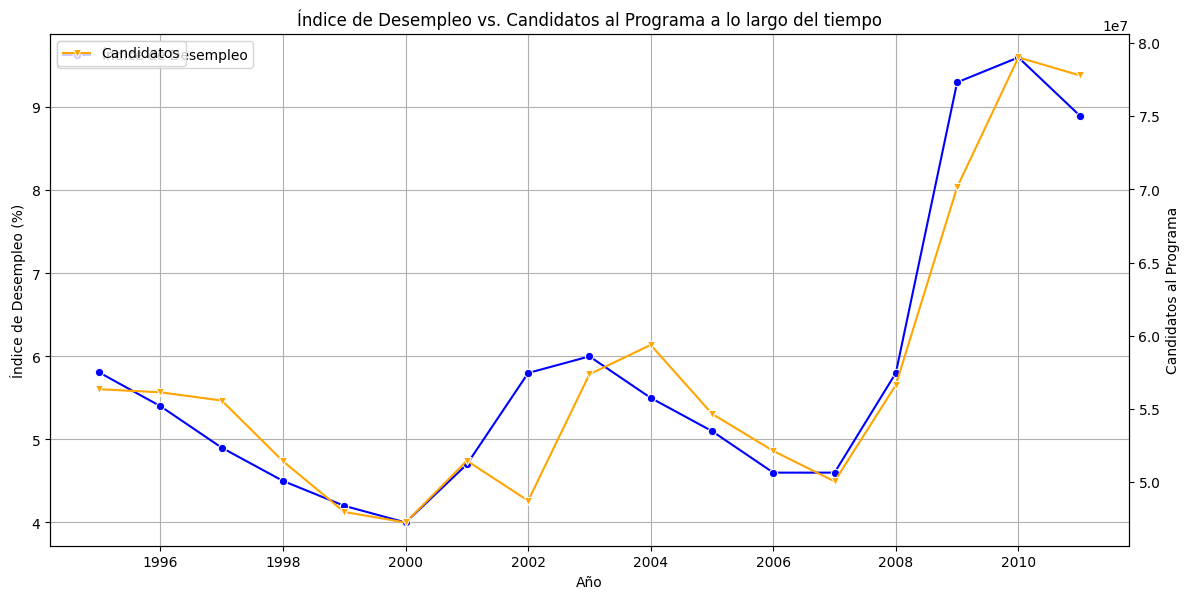

Correlación: 0.9461978421095703


In [183]:
# Convertir "Indice desempleo" a float si aún no lo es
df_integrado_final["Indice desempleo"] = (
    df_integrado_final["Indice desempleo"]
      .astype(str)            # Asegurarse de que sea string primero
      .str.replace(",", ".")  # Reemplazar comas por puntos
      .astype(float)          # Ahora convertir a float
)
print(df_integrado_final[["Indice desempleo", "Candidatos al programa"]].head())
print(df_integrado_final.dtypes)

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje izquierdo para el Índice de Desempleo
ax1.set_xlabel("Año", color="black")
ax1.set_ylabel("Índice de Desempleo (%)", color="black")
sns.lineplot(
    data=df_integrado_final,
    x="Año",
    y="Indice desempleo",
    ax=ax1,
    color="blue",
    marker="o",
    label="Índice de Desempleo"
)
# Asegurar que las marcas del eje Y sean negras
ax1.tick_params(axis="y", labelcolor="black")
ax1.tick_params(axis="x", labelcolor="black")
ax1.grid(True)

# Eje derecho para Candidatos al Programa
ax2 = ax1.twinx()
ax2.set_ylabel("Candidatos al Programa", color="black")
sns.lineplot(
    data=df_integrado_final,
    x="Año",
    y="Candidatos al programa",
    ax=ax2,
    color="orange",
    marker="v",
    label="Candidatos"
)
# Asegurar que las marcas del eje Y sean negras en el segundo eje
ax2.tick_params(axis="y", labelcolor="black")
ax2.tick_params(axis="x", labelcolor="black")  # opcional, si deseas también color negro en el eje X aquí

fig.tight_layout()
plt.title("Índice de Desempleo vs. Candidatos al Programa a lo largo del tiempo", color="black")
plt.show()

# Calcular la correlación entre "Indice desempleo" y "Candidatos al programa"
corr_value = df_integrado_final["Indice desempleo"].corr(df_integrado_final["Candidatos al programa"])
print("Correlación:", corr_value)


# New Section

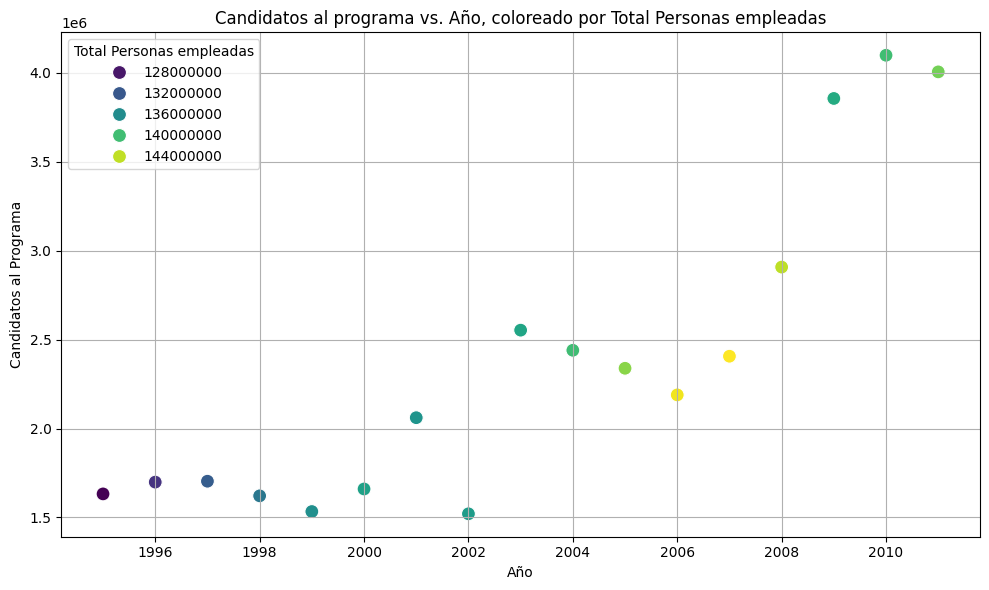

In [182]:
import matplotlib.pyplot as plt

# Assuming df_integrado_final is already defined from the previous code

plt.figure(figsize=(10, 6))
# Assuming 'Fuerza laboral entre 45 y 54 años' is the correct column name
sns.scatterplot(x=df_integrado_final["Año"], y=df_integrado_final["Fuerza laboral entre 45 y 54 años"],
                hue=df_integrado_final["Total Personas empleadas"], palette="viridis", s=100)


plt.title("Candidatos al programa vs. Año, coloreado por Total Personas empleadas")
plt.xlabel("Año")
plt.ylabel("Candidatos al Programa")
plt.grid(True)
plt.tight_layout()
plt.show()